# **Clasificación de frutas por su madurez**

## Visión Artificial - Semestre 2024-2

### **Integrantes**


*   Juan José Cañas - jcanast@unal.edu.co - CC1025883703
*   

"introducción al proyecto"

### **Descripción del dataset**

"introducir una breve descripción del dataset"

https://universe.roboflow.com/roboflow-universe-projects/banana-ripeness-classification/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true

Este dataset consta de 5616 imágenes de 640 x 480 pixeles en canales RGB.

In [3]:
#importamos librerias
import cv2
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Image
from skimage import morphology, measure
import csv
import os

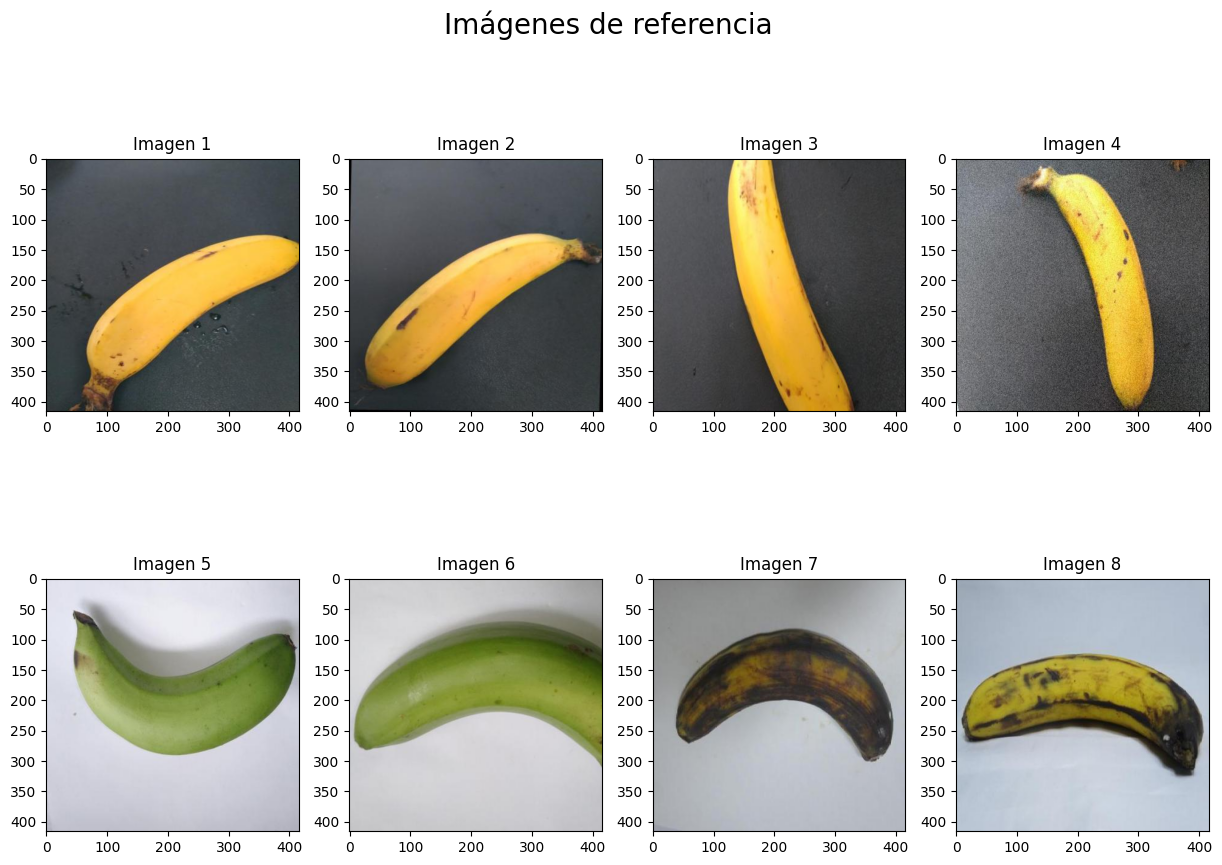

In [ ]:
#Se cargaran algunas imágenes del dataset distintas 
# Se deben pasar a RGB para poder visualizarlas correctamente, 
# Esto se hace con ayuda de la función COLOR_BGR2RGB de OpenCV
img1=cv2.cvtColor(cv2.imread("img/banana-ad7d5ed0-394a.jpg"),cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(cv2.imread("img/banana-c6cef9c7.jpg"),cv2.COLOR_BGR2RGB)
img7=cv2.cvtColor(cv2.imread("img/banana-de7cc774.jpg"),cv2.COLOR_BGR2RGB)
img8=cv2.cvtColor(cv2.imread("img/banana-df37cb83.jpg"),cv2.COLOR_BGR2RGB)
img5=cv2.cvtColor(cv2.imread("img/freshunripe-1e57db85.jpg"),cv2.COLOR_BGR2RGB)
img6=cv2.cvtColor(cv2.imread("img/freshunripe-69ea7cc6.jpg"),cv2.COLOR_BGR2RGB)
img7=cv2.cvtColor(cv2.imread("img/mold-e5d7bf46.jpg"),cv2.COLOR_BGR2RGB)
img8=cv2.cvtColor(cv2.imread("img/mold-e201c6ba.jpg"),cv2.COLOR_BGR2RGB)

#Se crea un arreglo 2 x 4 para mostrar las imágenes
fig1, arreglo_plots = plt.subplots(2,4, figsize=(15, 10))
fig1.suptitle('Imágenes de referencia', fontsize=20)
#Se asigna la imagen que va a ir en cada casilla del arreglo
arreglo_plots[0,0].set_title('Imagen 1')
arreglo_plots[0,0].imshow(img1)
arreglo_plots[0,1].set_title('Imagen 2')
arreglo_plots[0,1].imshow(img2)
arreglo_plots[0,2].set_title('Imagen 3')
arreglo_plots[0,2].imshow(img7)
arreglo_plots[0,3].set_title('Imagen 4')
arreglo_plots[0,3].imshow(img8)
arreglo_plots[1,0].set_title('Imagen 5')
arreglo_plots[1,0].imshow(img5)
arreglo_plots[1,1].set_title('Imagen 6')
arreglo_plots[1,1].imshow(img6)
arreglo_plots[1,2].set_title('Imagen 7')
arreglo_plots[1,2].imshow(img7)
arreglo_plots[1,3].set_title('Imagen 8')
arreglo_plots[1,3].imshow(img8)

**Limitantes y diferencias encontradas**<br>

"Describir las imagenes ¿que diferencias tiene? ¿que se nos podría llegar a complicar?"

## Análisis de Canales de Colores del Dataset

Para empezar el analisis de Canales de color vamos a tomar 4 imagenes cuyas caracteristicas no sean redundantes.

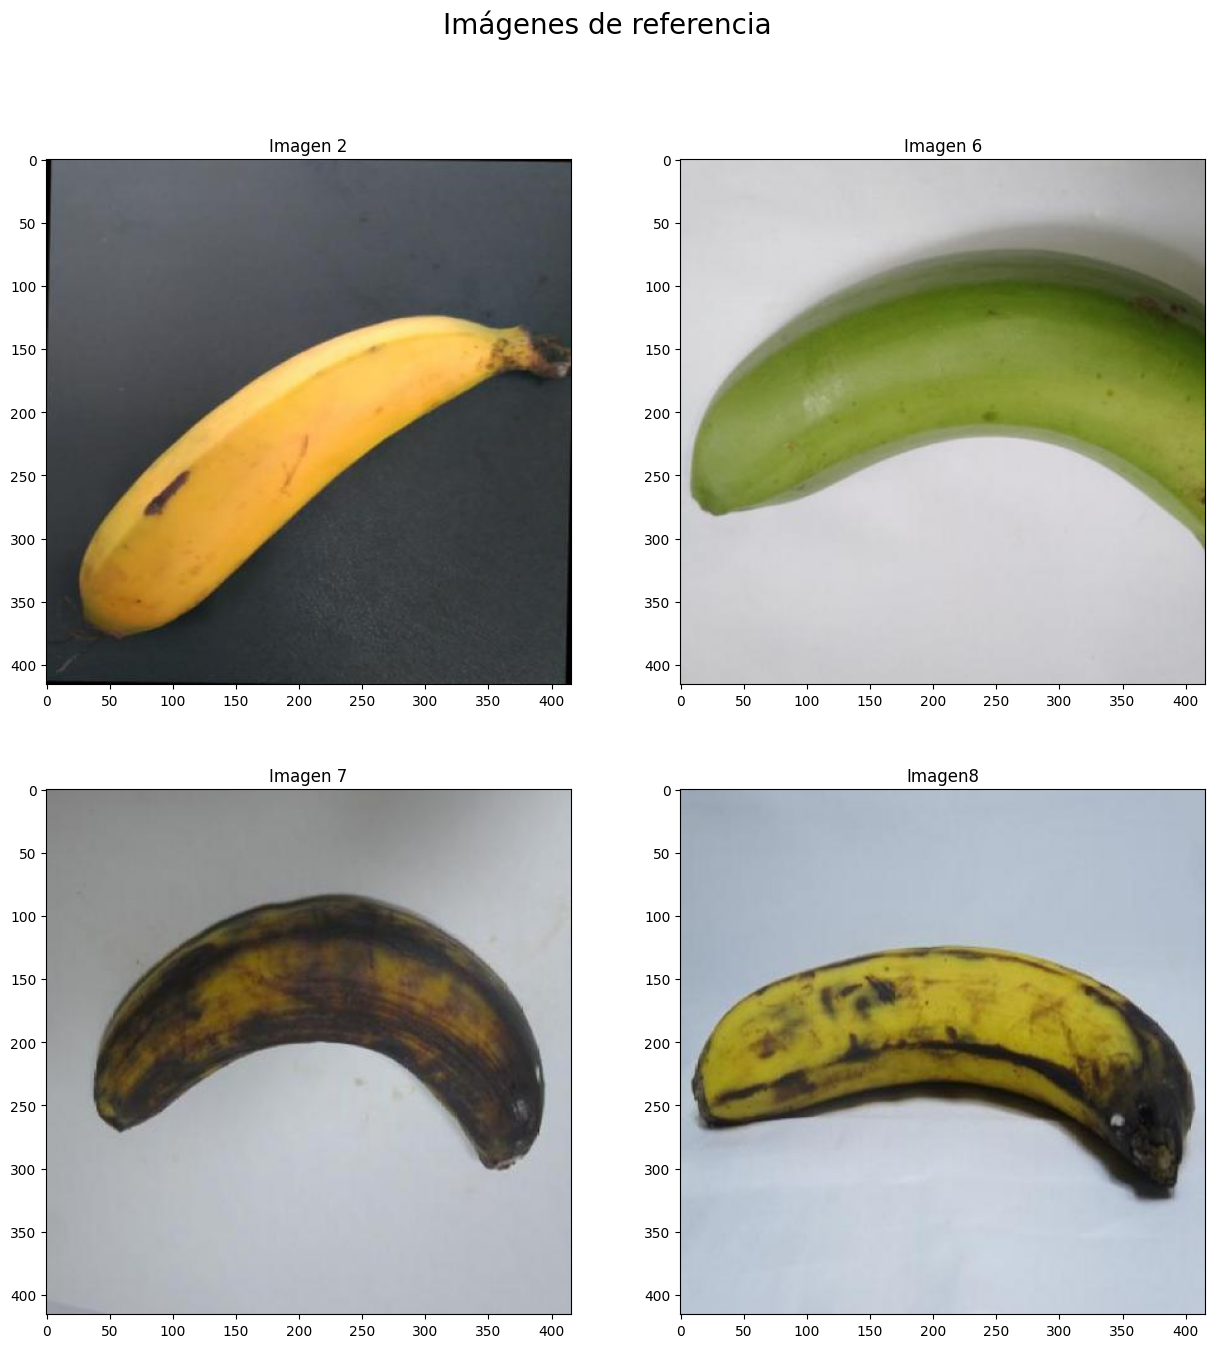

In [ ]:
#Se muestran las imágenes seleccionadas
fig1, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
fig1.suptitle('Imágenes de referencia', fontsize=20)

arreglo_plots[0,0].set_title('Imagen 2')
arreglo_plots[0,0].imshow(img2)
arreglo_plots[0,1].set_title('Imagen 6')
arreglo_plots[0,1].imshow(img6)
arreglo_plots[1,0].set_title('Imagen 7')
arreglo_plots[1,0].imshow(img7)
arreglo_plots[1,1].set_title('Imagen8')
arreglo_plots[1,1].imshow(img8)

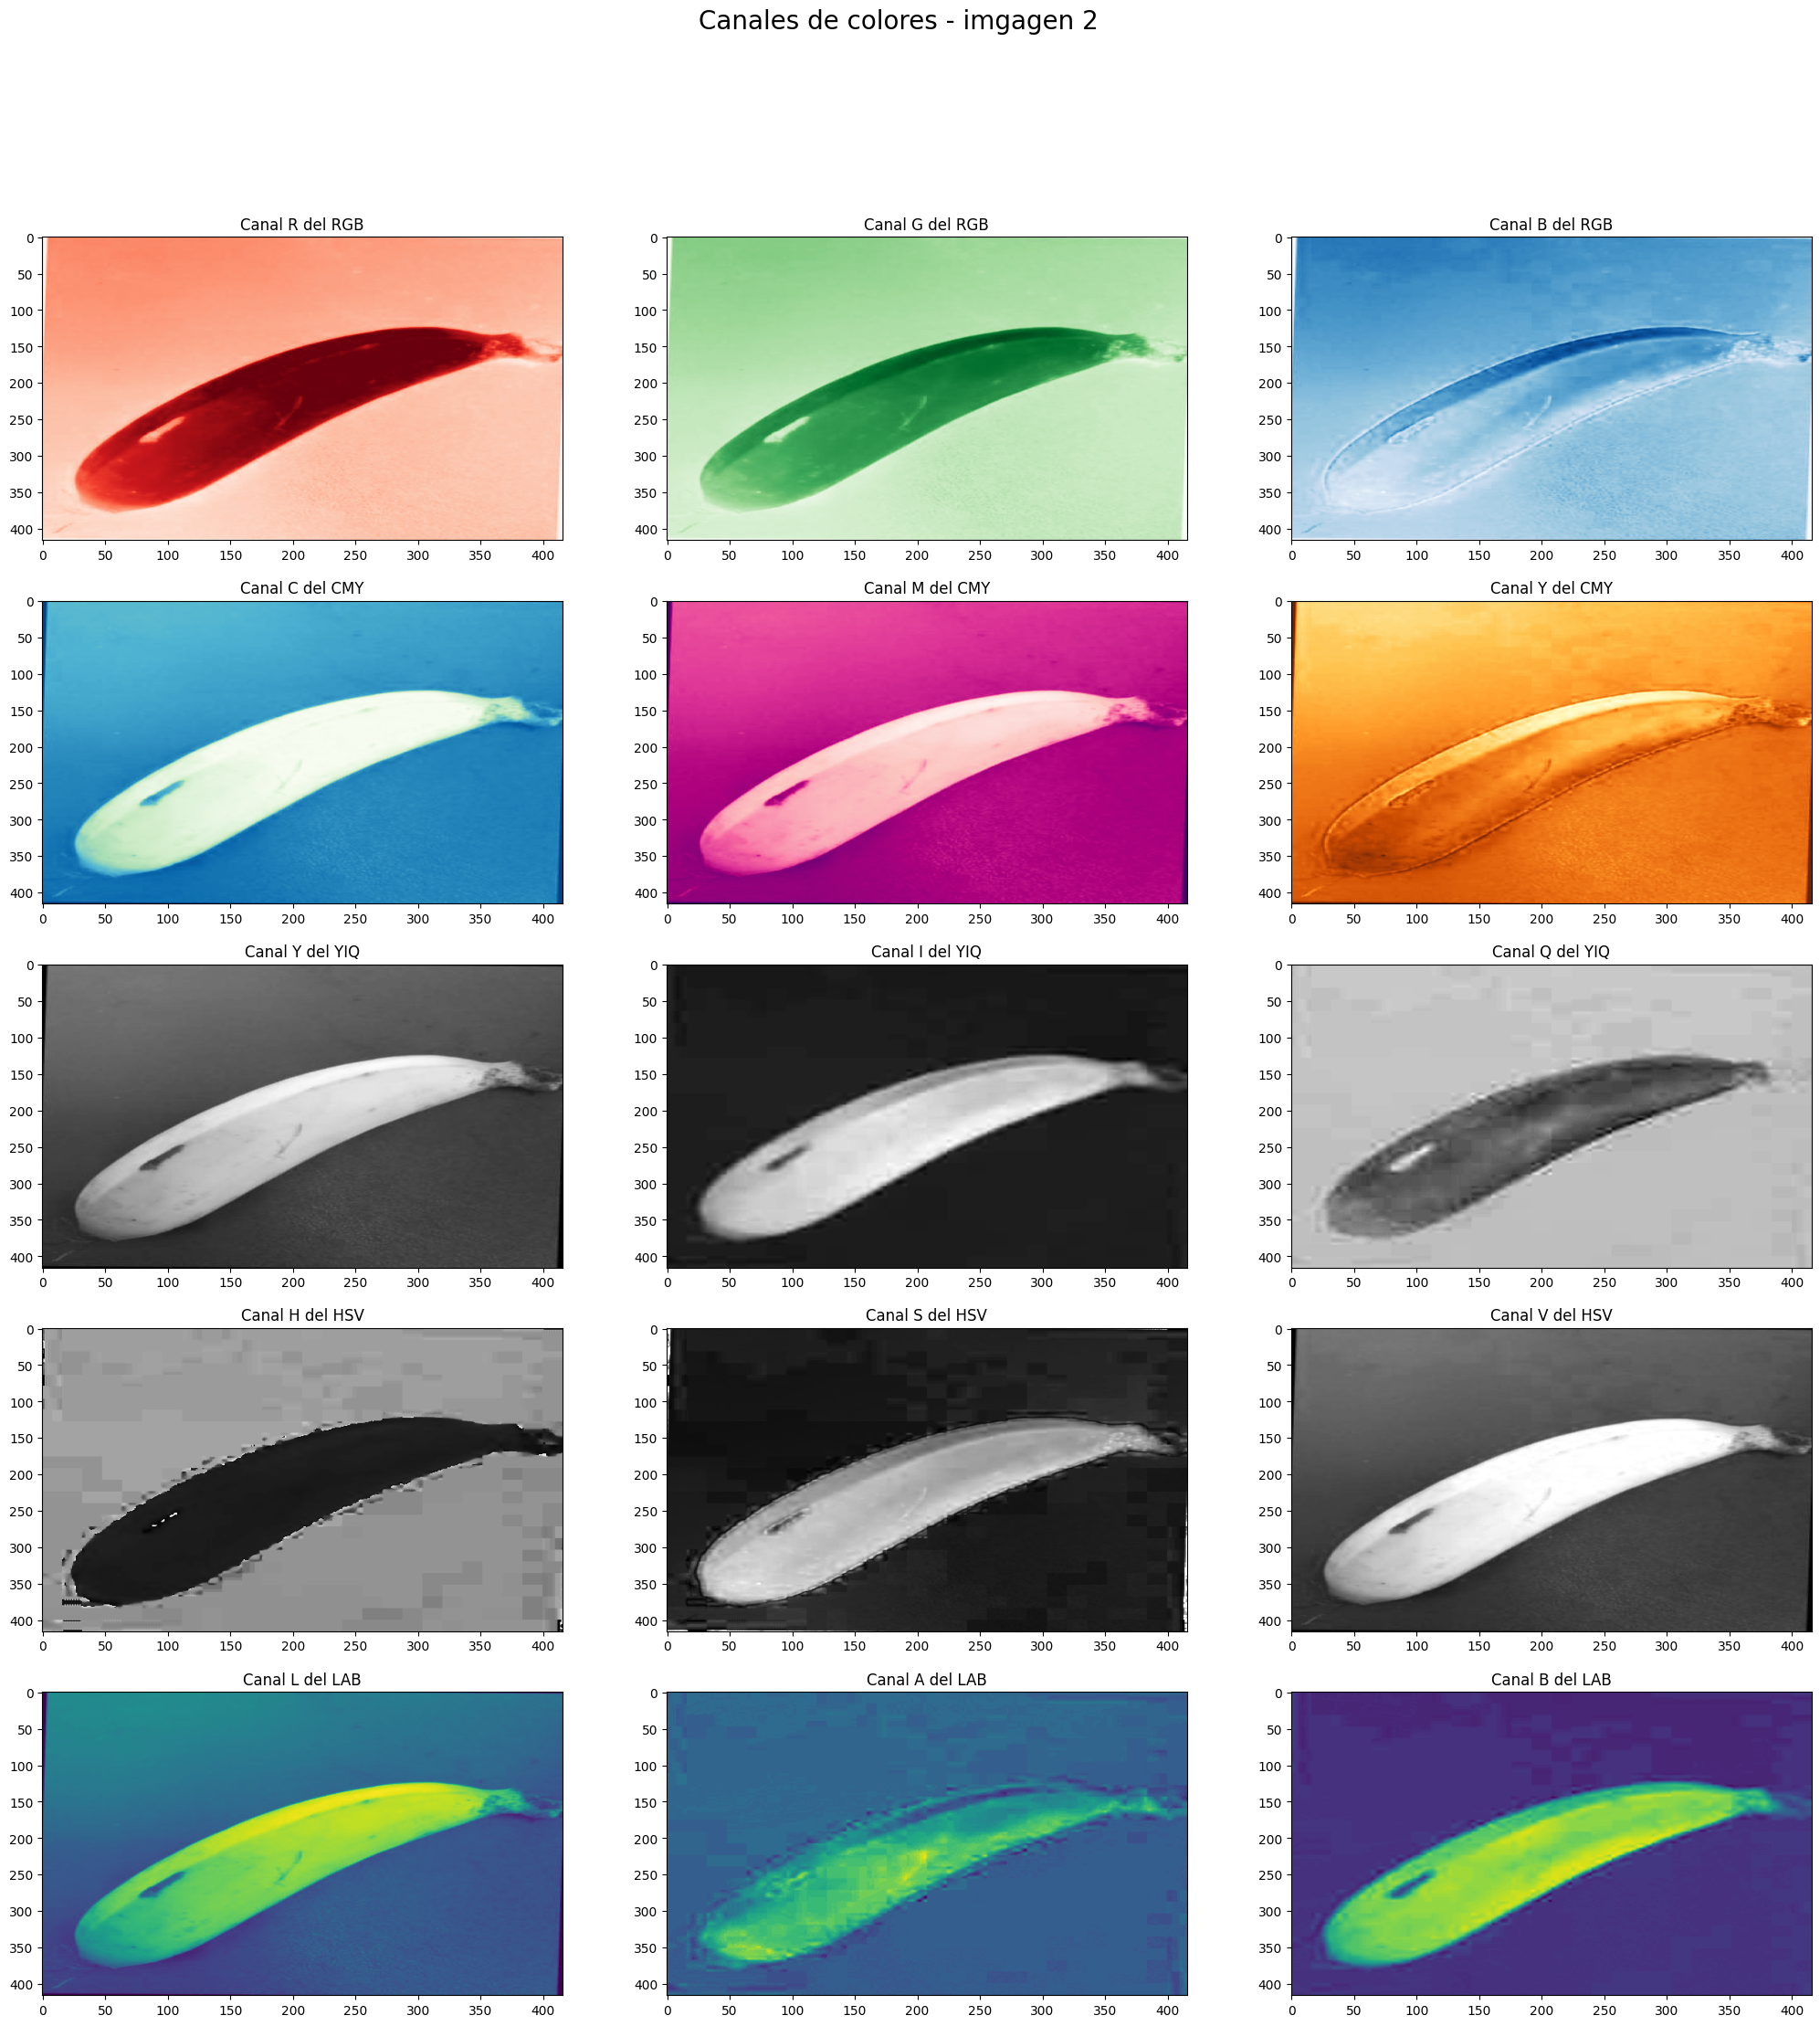

In [17]:
#RGB
img2_R = img2[:,:,0]
img2_G = img2[:,:,1]
img2_B = img2[:,:,2]

img6_R = img6[:,:,0]
img6_G = img6[:,:,1]
img6_B = img6[:,:,2]

img7_R = img7[:,:,0]
img7_G = img7[:,:,1]
img7_B = img7[:,:,2]

img8_R = img8[:,:,0]
img8_G = img8[:,:,1]
img8_B = img8[:,:,2]

#CMY
img2_C = 255 - img2[:,:,0]
img2_M = 255 - img2[:,:,1]
img2_Y = 255 - img2[:,:,2]

img6_C = 255 - img6[:,:,0]
img6_M = 255 - img6[:,:,1]
img6_Y = 255 - img6[:,:,2]

img7_C = 255 - img7[:,:,0]
img7_M = 255 - img7[:,:,1]
img7_Y = 255 - img7[:,:,2]

img8_C = 255 - img8[:,:,0]
img8_M = 255 - img8[:,:,1]
img8_Y = 255 - img8[:,:,2]

#YIQ 
img2_Y1 = 0.299*img2_R + 0.587*img2_G + 0.114*img2_B
img2_I = 0.596*img2_R - 0.274*img2_G - 0.322*img2_B
img2_Q = 0.211*img2_R - 0.523*img2_G + 0.312*img2_B

img6_Y1 = 0.299*img6_R + 0.587*img6_G + 0.114*img6_B
img6_I = 0.596*img6_R - 0.274*img6_G - 0.322*img6_B
img6_Q = 0.211*img6_R - 0.523*img6_G + 0.312*img6_B

img7_Y1 = 0.299*img7_R + 0.587*img7_G + 0.114*img7_B
img7_I = 0.596*img7_R - 0.274*img7_G - 0.322*img7_B
img7_Q = 0.211*img7_R - 0.523*img7_G + 0.312*img7_B

img8_Y1 = 0.299*img8_R + 0.587*img8_G + 0.114*img8_B
img8_I = 0.596*img8_R - 0.274*img8_G - 0.322*img8_B
img8_Q = 0.211*img8_R - 0.523*img8_G + 0.312*img8_B

#HSV
img2_HSV = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)
img6_HSV = cv2.cvtColor(img6, cv2.COLOR_RGB2HSV)
img7_HSV = cv2.cvtColor(img7, cv2.COLOR_RGB2HSV)
img8_HSV = cv2.cvtColor(img8, cv2.COLOR_RGB2HSV)
img5_HSV = cv2.cvtColor(img5, cv2.COLOR_RGB2HSV)

img2_H = img2_HSV[:,:,0]
img2_S = img2_HSV[:,:,1]
img2_V = img2_HSV[:,:,2]

img6_H = img6_HSV[:,:,0]
img6_S = img6_HSV[:,:,1]
img6_V = img6_HSV[:,:,2]

img7_H = img7_HSV[:,:,0]
img7_S = img7_HSV[:,:,1]
img7_V = img7_HSV[:,:,2]

img8_H = img8_HSV[:,:,0]
img8_S = img8_HSV[:,:,1]
img8_V = img8_HSV[:,:,2]


#LAB (B1 para que no redefina el B del RGB)
img2_LAB = cv2.cvtColor(img2, cv2.COLOR_RGB2LAB)
img6_LAB = cv2.cvtColor(img6, cv2.COLOR_RGB2LAB)
img7_LAB = cv2.cvtColor(img7, cv2.COLOR_RGB2LAB)
img8_LAB = cv2.cvtColor(img8, cv2.COLOR_RGB2LAB)
img5_LAB = cv2.cvtColor(img5, cv2.COLOR_RGB2LAB)

img2_L = img2_LAB[:,:,0]
img2_A = img2_LAB[:,:,1]
img2_B1 = img2_LAB[:,:,2]

img6_L = img6_LAB[:,:,0]
img6_A = img6_LAB[:,:,1]
img6_B1 = img6_LAB[:,:,2]

img7_L = img7_LAB[:,:,0]
img7_A = img7_LAB[:,:,1]
img7_B1 = img7_LAB[:,:,2]

img8_L = img8_LAB[:,:,0]
img8_A = img8_LAB[:,:,1]
img8_B1 = img8_LAB[:,:,2]


#imgagen 2
img2_fig, img2_arreglo = plt.subplots(5,3, figsize=(25, 25))
img2_fig.suptitle('Canales de colores - imgagen 2', fontsize=20)
#RGB
img2_arreglo[0,0].set_title('Canal R del RGB')
img2_arreglo[0,0].imshow(img2_R, cmap='Reds', aspect='auto')
img2_arreglo[0,1].set_title('Canal G del RGB')
img2_arreglo[0,1].imshow(img2_G, cmap='Greens', aspect='auto')
img2_arreglo[0,2].set_title('Canal B del RGB')
img2_arreglo[0,2].imshow(img2_B, cmap='Blues', aspect='auto')
#CMY
img2_arreglo[1,0].set_title('Canal C del CMY')
img2_arreglo[1,0].imshow(img2_C, cmap='GnBu', aspect='auto')
img2_arreglo[1,1].set_title('Canal M del CMY')
img2_arreglo[1,1].imshow(img2_M, cmap='RdPu', aspect='auto')
img2_arreglo[1,2].set_title('Canal Y del CMY')
img2_arreglo[1,2].imshow(img2_Y, cmap='YlOrBr', aspect='auto')
#YIQ
img2_arreglo[2,0].set_title('Canal Y del YIQ')
img2_arreglo[2,0].imshow(img2_Y1, cmap='gray', aspect='auto')
img2_arreglo[2,1].set_title('Canal I del YIQ')
img2_arreglo[2,1].imshow(img2_I, cmap='gray', aspect='auto')
img2_arreglo[2,2].set_title('Canal Q del YIQ')
img2_arreglo[2,2].imshow(img2_Q, cmap='gray', aspect='auto')
#HSV
img2_arreglo[3,0].set_title('Canal H del HSV')
img2_arreglo[3,0].imshow(img2_H, cmap='gray', aspect='auto')
img2_arreglo[3,1].set_title('Canal S del HSV')
img2_arreglo[3,1].imshow(img2_S, cmap='gray', aspect='auto')
img2_arreglo[3,2].set_title('Canal V del HSV')
img2_arreglo[3,2].imshow(img2_V, cmap='gray', aspect='auto')
#LAB
img2_arreglo[4,0].set_title('Canal L del LAB')
img2_arreglo[4,0].imshow(img2_L, aspect='auto')
img2_arreglo[4,1].set_title('Canal A del LAB')
img2_arreglo[4,1].imshow(img2_A, aspect='auto')
img2_arreglo[4,2].set_title('Canal B del LAB')
img2_arreglo[4,2].imshow(img2_B1, aspect='auto')

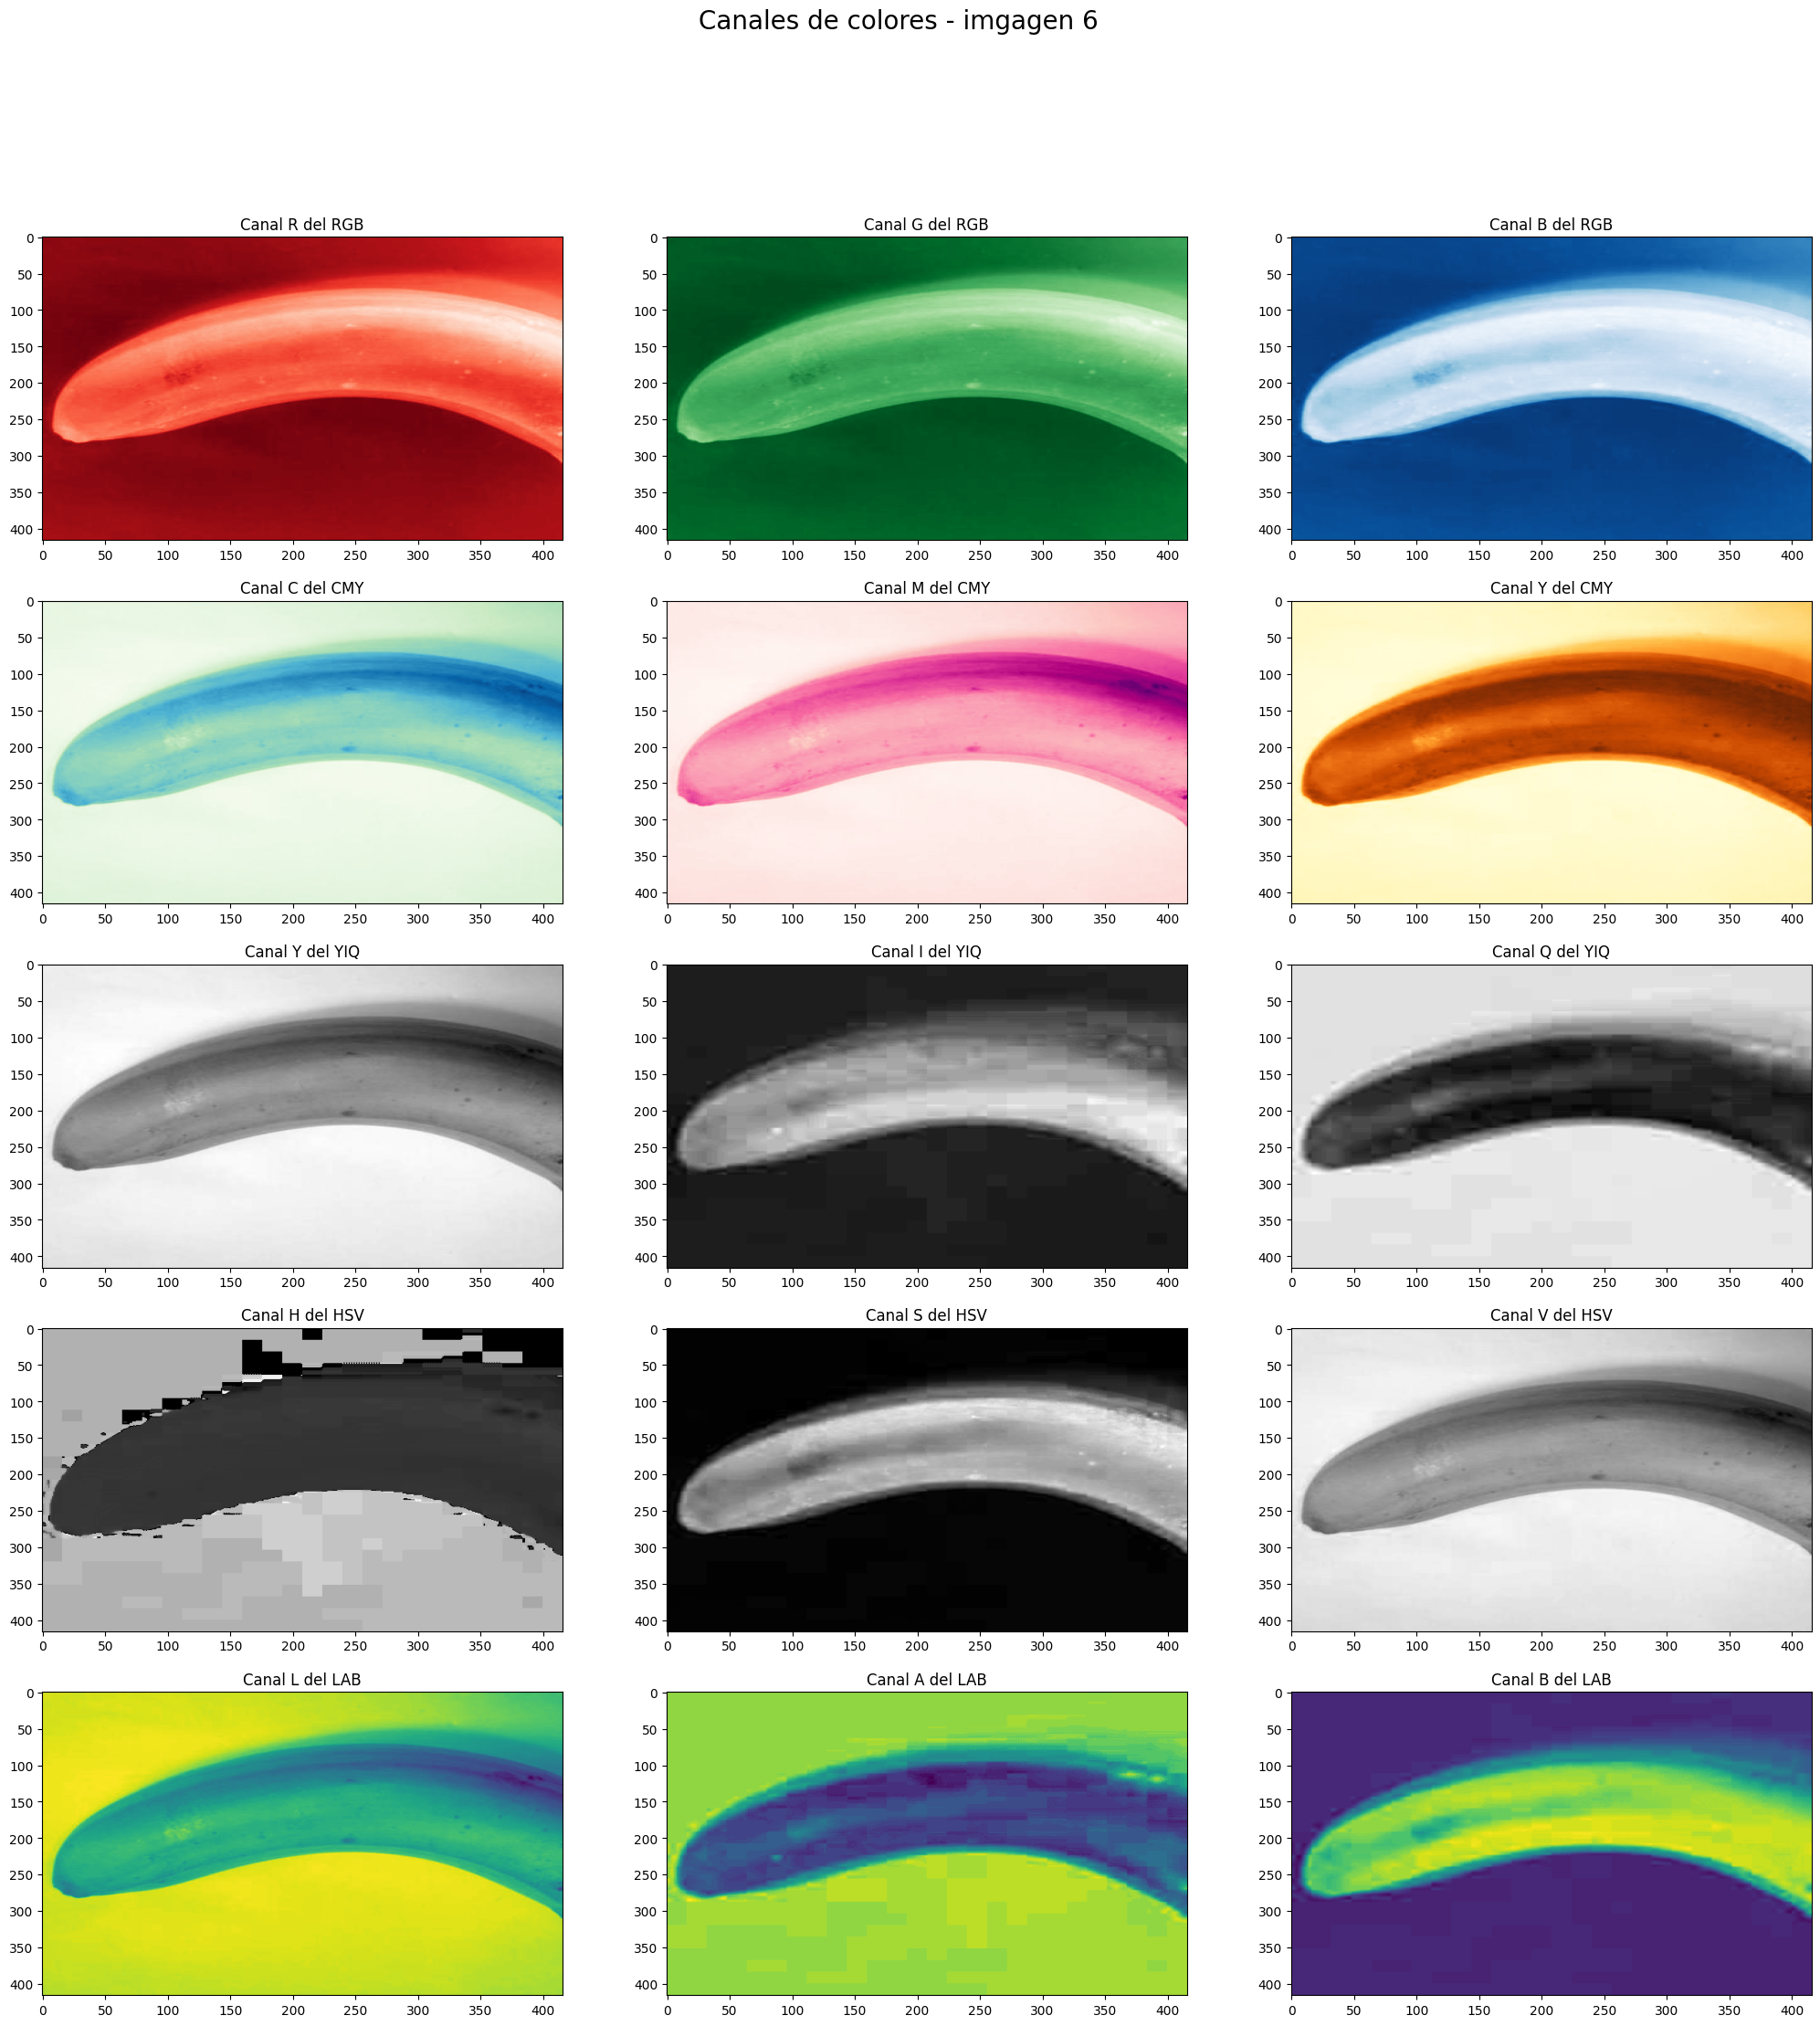

In [16]:
#imgagen 6
img6_fig, img6_arreglo = plt.subplots(5,3, figsize=(25, 25))
img6_fig.suptitle('Canales de colores - imgagen 6', fontsize=20)
#RGB
img6_arreglo[0,0].set_title('Canal R del RGB')
img6_arreglo[0,0].imshow(img6_R, cmap='Reds', aspect='auto')
img6_arreglo[0,1].set_title('Canal G del RGB')
img6_arreglo[0,1].imshow(img6_G, cmap='Greens', aspect='auto')
img6_arreglo[0,2].set_title('Canal B del RGB')
img6_arreglo[0,2].imshow(img6_B, cmap='Blues', aspect='auto')
#CMY
img6_arreglo[1,0].set_title('Canal C del CMY')
img6_arreglo[1,0].imshow(img6_C, cmap='GnBu', aspect='auto')
img6_arreglo[1,1].set_title('Canal M del CMY')
img6_arreglo[1,1].imshow(img6_M, cmap='RdPu', aspect='auto')
img6_arreglo[1,2].set_title('Canal Y del CMY')
img6_arreglo[1,2].imshow(img6_Y, cmap='YlOrBr', aspect='auto')
#YIQ
img6_arreglo[2,0].set_title('Canal Y del YIQ')
img6_arreglo[2,0].imshow(img6_Y1, cmap='gray', aspect='auto')
img6_arreglo[2,1].set_title('Canal I del YIQ')
img6_arreglo[2,1].imshow(img6_I, cmap='gray', aspect='auto')
img6_arreglo[2,2].set_title('Canal Q del YIQ')
img6_arreglo[2,2].imshow(img6_Q, cmap='gray', aspect='auto')
#HSV
img6_arreglo[3,0].set_title('Canal H del HSV')
img6_arreglo[3,0].imshow(img6_H, cmap='gray', aspect='auto')
img6_arreglo[3,1].set_title('Canal S del HSV')
img6_arreglo[3,1].imshow(img6_S, cmap='gray', aspect='auto')
img6_arreglo[3,2].set_title('Canal V del HSV')
img6_arreglo[3,2].imshow(img6_V, cmap='gray', aspect='auto')
#LAB
img6_arreglo[4,0].set_title('Canal L del LAB')
img6_arreglo[4,0].imshow(img6_L, aspect='auto')
img6_arreglo[4,1].set_title('Canal A del LAB')
img6_arreglo[4,1].imshow(img6_A, aspect='auto')
img6_arreglo[4,2].set_title('Canal B del LAB')
img6_arreglo[4,2].imshow(img6_B1, aspect='auto')

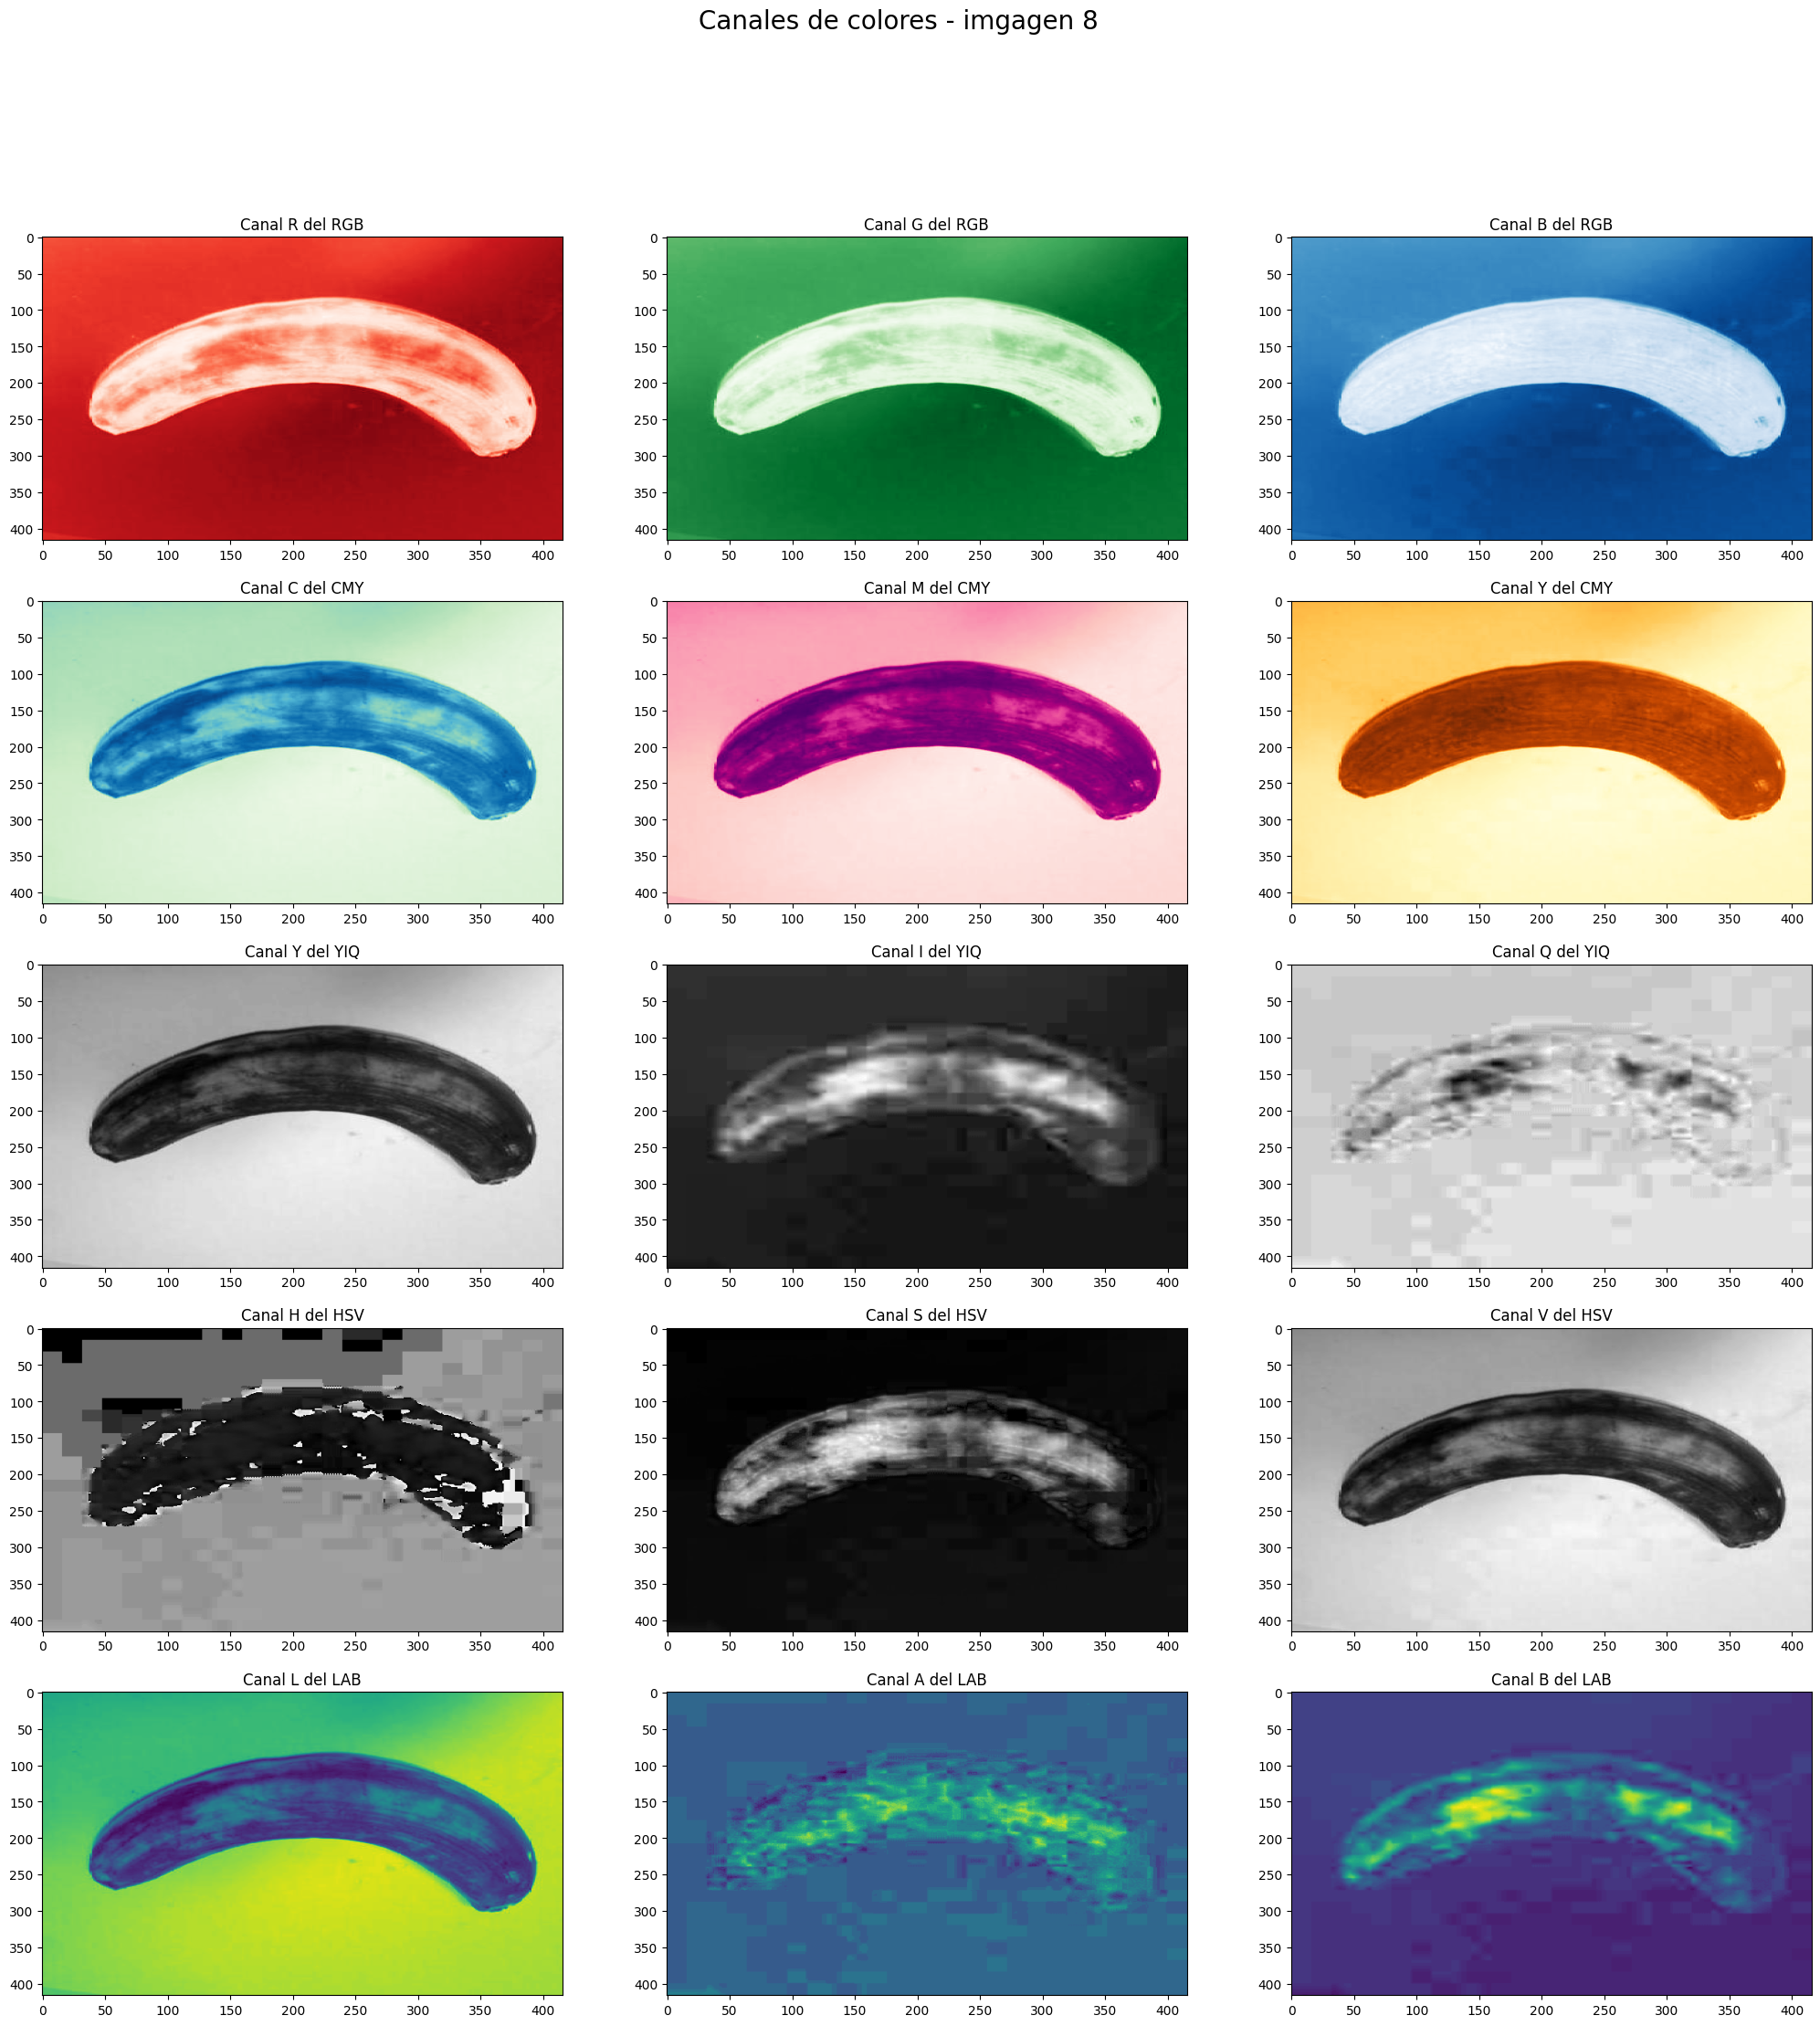

In [18]:
#imgagen 7
img7_fig, img7_arreglo = plt.subplots(5,3, figsize=(25, 25))
img7_fig.suptitle('Canales de colores - imgagen 8', fontsize=20)
#RGB
img7_arreglo[0,0].set_title('Canal R del RGB')
img7_arreglo[0,0].imshow(img7_R, cmap='Reds', aspect='auto')
img7_arreglo[0,1].set_title('Canal G del RGB')
img7_arreglo[0,1].imshow(img7_G, cmap='Greens', aspect='auto')
img7_arreglo[0,2].set_title('Canal B del RGB')
img7_arreglo[0,2].imshow(img7_B, cmap='Blues', aspect='auto')
#CMY
img7_arreglo[1,0].set_title('Canal C del CMY')
img7_arreglo[1,0].imshow(img7_C, cmap='GnBu', aspect='auto')
img7_arreglo[1,1].set_title('Canal M del CMY')
img7_arreglo[1,1].imshow(img7_M, cmap='RdPu', aspect='auto')
img7_arreglo[1,2].set_title('Canal Y del CMY')
img7_arreglo[1,2].imshow(img7_Y, cmap='YlOrBr', aspect='auto')
#YIQ
img7_arreglo[2,0].set_title('Canal Y del YIQ')
img7_arreglo[2,0].imshow(img7_Y1, cmap='gray', aspect='auto')
img7_arreglo[2,1].set_title('Canal I del YIQ')
img7_arreglo[2,1].imshow(img7_I, cmap='gray', aspect='auto')
img7_arreglo[2,2].set_title('Canal Q del YIQ')
img7_arreglo[2,2].imshow(img7_Q, cmap='gray', aspect='auto')
#HSV
img7_arreglo[3,0].set_title('Canal H del HSV')
img7_arreglo[3,0].imshow(img7_H, cmap='gray', aspect='auto')
img7_arreglo[3,1].set_title('Canal S del HSV')
img7_arreglo[3,1].imshow(img7_S, cmap='gray', aspect='auto')
img7_arreglo[3,2].set_title('Canal V del HSV')
img7_arreglo[3,2].imshow(img7_V, cmap='gray', aspect='auto')
#LAB
img7_arreglo[4,0].set_title('Canal L del LAB')
img7_arreglo[4,0].imshow(img7_L, aspect='auto')
img7_arreglo[4,1].set_title('Canal A del LAB')
img7_arreglo[4,1].imshow(img7_A, aspect='auto')
img7_arreglo[4,2].set_title('Canal B del LAB')
img7_arreglo[4,2].imshow(img7_B1, aspect='auto')

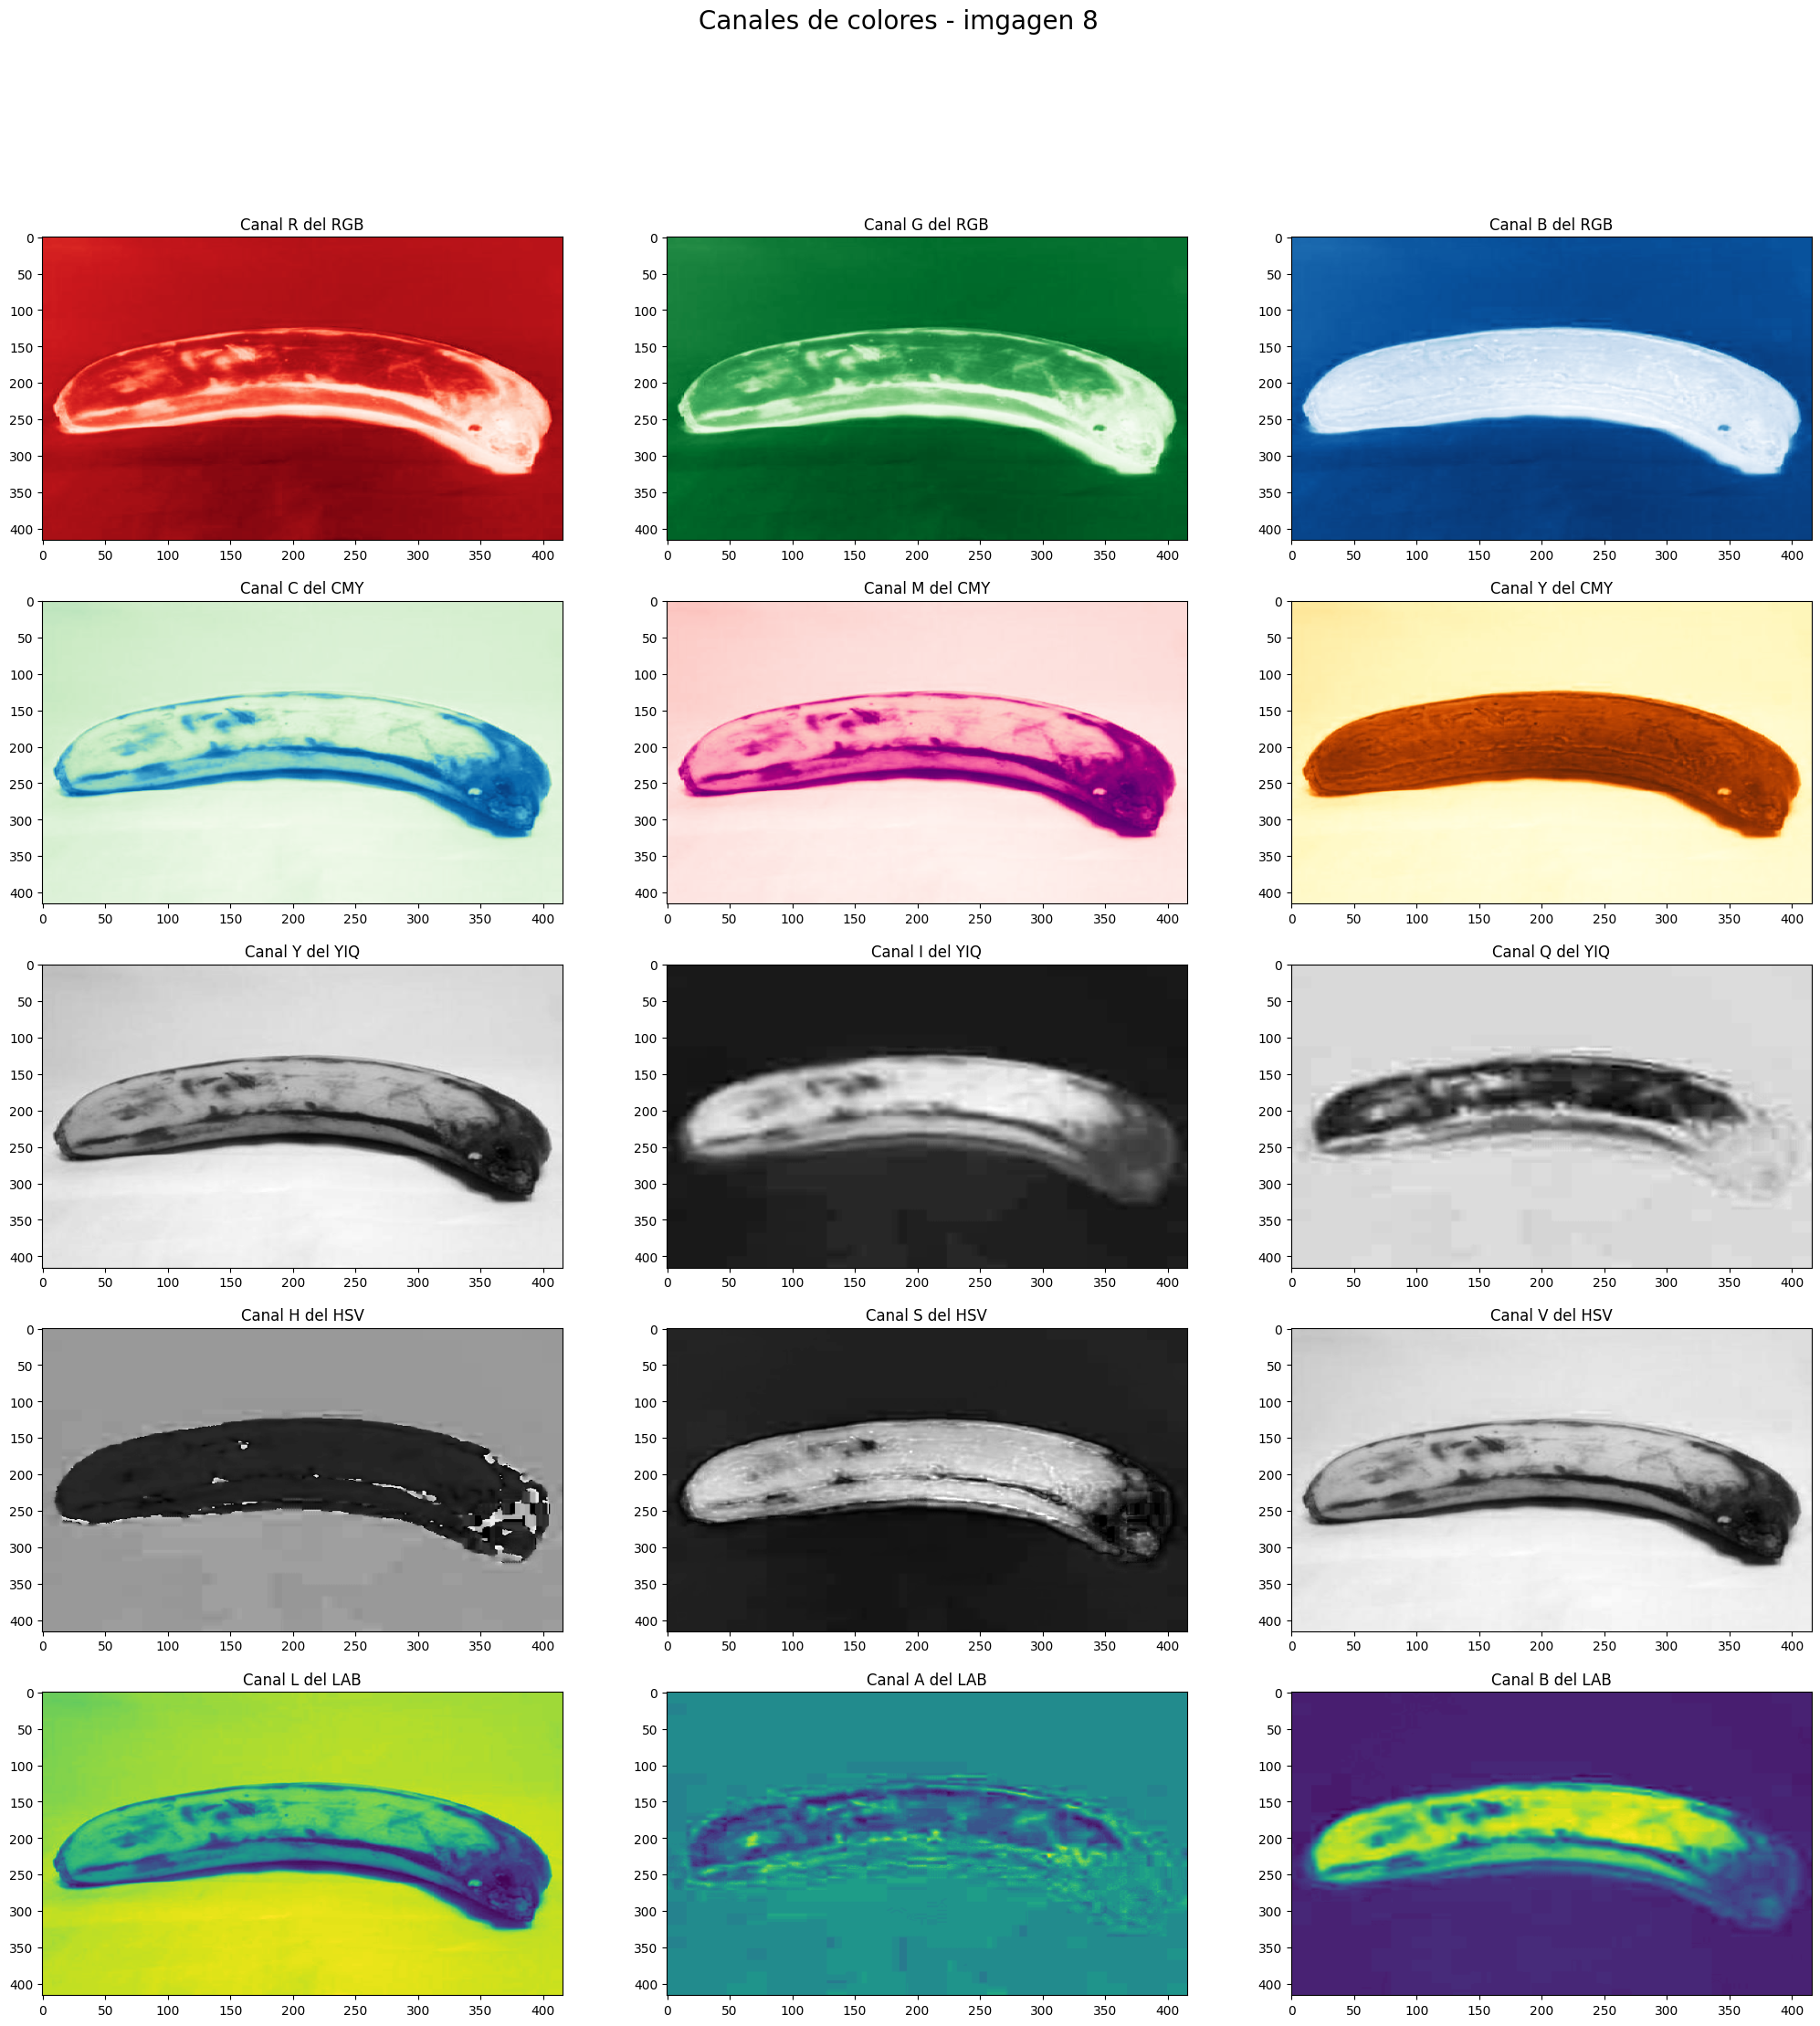

In [19]:
#imgagen 7
img8_fig, img8_arreglo = plt.subplots(5,3, figsize=(25, 25))
img8_fig.suptitle('Canales de colores - imgagen 8', fontsize=20)
#RGB
img8_arreglo[0,0].set_title('Canal R del RGB')
img8_arreglo[0,0].imshow(img8_R, cmap='Reds', aspect='auto')
img8_arreglo[0,1].set_title('Canal G del RGB')
img8_arreglo[0,1].imshow(img8_G, cmap='Greens', aspect='auto')
img8_arreglo[0,2].set_title('Canal B del RGB')
img8_arreglo[0,2].imshow(img8_B, cmap='Blues', aspect='auto')
#CMY
img8_arreglo[1,0].set_title('Canal C del CMY')
img8_arreglo[1,0].imshow(img8_C, cmap='GnBu', aspect='auto')
img8_arreglo[1,1].set_title('Canal M del CMY')
img8_arreglo[1,1].imshow(img8_M, cmap='RdPu', aspect='auto')
img8_arreglo[1,2].set_title('Canal Y del CMY')
img8_arreglo[1,2].imshow(img8_Y, cmap='YlOrBr', aspect='auto')
#YIQ
img8_arreglo[2,0].set_title('Canal Y del YIQ')
img8_arreglo[2,0].imshow(img8_Y1, cmap='gray', aspect='auto')
img8_arreglo[2,1].set_title('Canal I del YIQ')
img8_arreglo[2,1].imshow(img8_I, cmap='gray', aspect='auto')
img8_arreglo[2,2].set_title('Canal Q del YIQ')
img8_arreglo[2,2].imshow(img8_Q, cmap='gray', aspect='auto')
#HSV
img8_arreglo[3,0].set_title('Canal H del HSV')
img8_arreglo[3,0].imshow(img8_H, cmap='gray', aspect='auto')
img8_arreglo[3,1].set_title('Canal S del HSV')
img8_arreglo[3,1].imshow(img8_S, cmap='gray', aspect='auto')
img8_arreglo[3,2].set_title('Canal V del HSV')
img8_arreglo[3,2].imshow(img8_V, cmap='gray', aspect='auto')
#LAB
img8_arreglo[4,0].set_title('Canal L del LAB')
img8_arreglo[4,0].imshow(img8_L, aspect='auto')
img8_arreglo[4,1].set_title('Canal A del LAB')
img8_arreglo[4,1].imshow(img8_A, aspect='auto')
img8_arreglo[4,2].set_title('Canal B del LAB')
img8_arreglo[4,2].imshow(img8_B1, aspect='auto')